In [2]:
import pandas as pd
import re
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [3]:
file_name = 'Komplett Dataset'

In [4]:
data = pd.read_excel(file_name + '.xlsx')

In [5]:
# Finds positions of laughters 

laughs = data['Transcripts'].apply(lambda a: np.array([m.start() for m in re.finditer('(Laughter)', a)]))

In [6]:
# Counts the number of laughs and lengths

number_of_laughs = laughs.apply(len)
transcript_lenghts = data['Transcripts'].apply(len)

In [7]:
# Normalizes laugh locations

laugh_locations = []
for locations, size in zip(laughs, transcript_lenghts):
    laugh_locations.append(locations / size)

In [8]:
# Defines the triangular fuzzy variables

centers = [0, 0.25, 0.50, 0.75, 1]
widths = [0.2, 0.2, 0.2, 0.2, 0.2]

In [9]:
# Sum the contribution for each laugh on eac fuzzy variable

new_variables = []
for talk, n_laughts in zip(laugh_locations, number_of_laughs):
    new_variable_counts = [n_laughts]
    for center, width in zip(centers, widths):
        center_value = 0
        for laugh in talk:
            distance = abs(laugh - center)
            if distance < width:
                center_value += distance / width
        else:
            new_variable_counts.append(center_value)
    new_variables.append(new_variable_counts)

In [10]:
# Name the variables

new_column_names = [*['triangle_' + str(center) for center in centers]]
new_variables_pd = pd.DataFrame(new_variables, columns=['number_of_laughs', *new_column_names])

In [11]:
# Normalizing the new variables

new_variables_pd_normalized = new_variables_pd[new_column_names]\
    .div(new_variables_pd[new_column_names].sum(axis=1), axis=0)

new_variables_pd_normalized = new_variables_pd_normalized.fillna(0)

In [12]:
data = data.join(new_variables_pd)
data = data.join(new_variables_pd_normalized, rsuffix='_normalized')

## Distribution of laughs over time normalized 

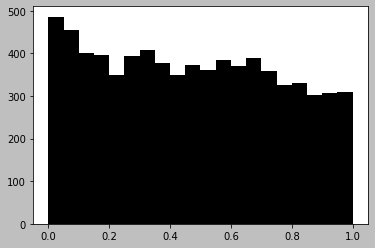

In [14]:
# How far in, percentage wise, the laughs occur

plt.style.use('grayscale')

all_locations = []
for talk in laugh_locations:
    for t in talk:
        all_locations.append(t)
        
all_locations = np.array(all_locations)

fig, ax = plt.subplots()#figsize=(6, 3))
ax.hist(all_locations, bins=20)

plt.savefig('Laughs_distributed.pdf', transparent=True, bbox_inches='tight')

plt.show()